<a href="https://colab.research.google.com/github/SumitDS23/MEDICAL_INSURANCE_PREDICTION/blob/main/BDNS_ET_Assignment_C23034.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.6/603.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 17.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import pymongo
import json

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
xy=pd.read_csv("/content/drive/MyDrive/insurance.csv")

#Reading the Data and Converting the Same to Dictionary

In [6]:
data=xy.to_dict(orient="records")
data

[{'age': 19,
  'sex': 'female',
  'bmi': 27.9,
  'children': 0,
  'smoker': 'yes',
  'region': 'southwest',
  'charges': 16884.924},
 {'age': 18,
  'sex': 'male',
  'bmi': 33.77,
  'children': 1,
  'smoker': 'no',
  'region': 'southeast',
  'charges': 1725.5523},
 {'age': 28,
  'sex': 'male',
  'bmi': 33.0,
  'children': 3,
  'smoker': 'no',
  'region': 'southeast',
  'charges': 4449.462},
 {'age': 33,
  'sex': 'male',
  'bmi': 22.705,
  'children': 0,
  'smoker': 'no',
  'region': 'northwest',
  'charges': 21984.47061},
 {'age': 32,
  'sex': 'male',
  'bmi': 28.88,
  'children': 0,
  'smoker': 'no',
  'region': 'northwest',
  'charges': 3866.8552},
 {'age': 31,
  'sex': 'female',
  'bmi': 25.74,
  'children': 0,
  'smoker': 'no',
  'region': 'southeast',
  'charges': 3756.6216},
 {'age': 46,
  'sex': 'female',
  'bmi': 33.44,
  'children': 1,
  'smoker': 'no',
  'region': 'southeast',
  'charges': 8240.5896},
 {'age': 37,
  'sex': 'female',
  'bmi': 27.74,
  'children': 3,
  'smoker':

#Uploading data in Mongodb

In [7]:
import pymongo
from pymongo import MongoClient
#mongo client is connected
client = MongoClient()
db     = client['insurancedata']

In [8]:
!curl -fsSL https://pgp.mongodb.com/server-6.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-6.0.gpg \
   --dearmor
!echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list
!sudo apt-get update > /dev/null
!sudo apt-get install -y mongodb-org > /dev/null
!sudo mkdir -p /var/log/mongodb /var/lib/mongodb
!sudo chown `whoami` /var/lib/mongodb /var/log/mongodb/

deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 9.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [9]:
!nohup mongod --config /etc/mongod.conf &

nohup: appending output to 'nohup.out'


In [12]:
url = "mongodb://localhost:27017"
client = MongoClient(url)
client.list_database_names()

['admin', 'config', 'local']

In [14]:
client = MongoClient('mongodb://localhost:27017/')
db = client['BDNS']
collection = db['datascience']

In [16]:
collection.insert_many(data)

In [17]:
client.close()

In [19]:
url = "mongodb://localhost:27017"
client = MongoClient(url)
client.list_database_names()

['BDNS', 'admin', 'config', 'local']

In [20]:
client = MongoClient('mongodb://localhost:27017/')
db = client['BDNS']
collection = db['datascience']

In [34]:
df = collection.find()
df

In [35]:
x=[]
for i in df:
  x.append(i)

In [39]:
yz=pd.DataFrame(x)
yz

,_id,age,sex,bmi,children,smoker,region,charges
0,64da30772f3a0839b0a82b2e,19,female,27.900,0,yes,southwest,16884.92400
1,64da30772f3a0839b0a82b2f,18,male,33.770,1,no,southeast,1725.55230
2,64da30772f3a0839b0a82b30,28,male,33.000,3,no,southeast,4449.46200
3,64da30772f3a0839b0a82b31,33,male,22.705,0,no,northwest,21984.47061
4,64da30772f3a0839b0a82b32,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,64da30772f3a0839b0a83063,50,male,30.970,3,no,northwest,10600.54830
1334,64da30772f3a0839b0a83064,18,female,31.920,0,no,northeast,2205.98080
1335,64da30772f3a0839b0a83065,18,female,36.850,0,no,southeast,1629.83350
1336,64da30772f3a0839b0a83066,21,female,25.800,0,no,southwest,2007.94500


In [42]:
yz=yz.drop('_id',axis=1)

In [43]:
yz

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Installation of Spark

In [44]:
!pip3 -q install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Praxis').getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [45]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import col, asc,desc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.sql import SQLContext
from pyspark.mllib.stat import Statistics
import pandas as pd
from pyspark.sql.functions import udf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix

#Converting Mongodb data to spark dataframe

In [46]:
ls

drive/  nohup.out  sample_data/


In [47]:
spark = SparkSession.builder.appName('BDNS').getOrCreate()

SCHEMA FOR SPARK TABLE

In [53]:
data=spark.read.csv('/content/drive/MyDrive/insurance.csv',inferSchema=True,header=True)

In [54]:
data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [56]:
data.count(), len(data.columns)

(1338, 7)

#Data Exploration

In [58]:
data.count(), len(data.columns)

(1338, 7)

In [59]:
data.dtypes

[('age', 'int'),
 ('sex', 'string'),
 ('bmi', 'double'),
 ('children', 'int'),
 ('smoker', 'string'),
 ('region', 'string'),
 ('charges', 'double')]

In [60]:
data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [61]:
data.count()

1338

In [62]:

data.columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [63]:
data.describe().show()

+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|summary|               age|   sex|               bmi|         children|smoker|   region|           charges|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|  count|              1338|  1338|              1338|             1338|  1338|     1338|              1338|
|   mean| 39.20702541106129|  null|30.663396860986538|  1.0949177877429|  null|     null|13270.422265141257|
| stddev|14.049960379216147|  null| 6.098186911679012|1.205492739781914|  null|     null|12110.011236693992|
|    min|                18|female|             15.96|                0|    no|northeast|         1121.8739|
|    max|                64|  male|             53.13|                5|   yes|southwest|       63770.42801|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+



In [64]:
for col in data.columns:
  print(col, "has", data.filter(data[col].isNull()).count(), "Null values.")

age has 0 Null values.
sex has 0 Null values.
bmi has 0 Null values.
children has 0 Null values.
smoker has 0 Null values.
region has 0 Null values.
charges has 0 Null values.


In [65]:
data.groupBy("bmi").count().sort("bmi").show()

+------+-----+
|   bmi|count|
+------+-----+
| 15.96|    1|
|16.815|    2|
|17.195|    1|
| 17.29|    3|
|17.385|    1|
|  17.4|    1|
| 17.48|    1|
| 17.67|    1|
|17.765|    1|
|  17.8|    1|
| 17.86|    1|
|17.955|    1|
| 18.05|    1|
|  18.3|    1|
|18.335|    3|
|  18.5|    1|
|  18.6|    1|
|18.715|    1|
|18.905|    1|
|  19.0|    1|
+------+-----+
only showing top 20 rows



In [66]:
# Checking for the instance where the fuel is 'Electric'
data.where(data.region == 'northwest').show()

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
| 37|female| 27.74|       3|    no|northwest|  7281.5056|
| 60|female| 25.84|       0|    no|northwest|28923.13692|
| 37|  male|28.025|       2|    no|northwest| 6203.90175|
| 55|female|32.775|       2|    no|northwest|12268.63225|
| 23|  male|17.385|       1|    no|northwest| 2775.19215|
| 63|  male| 28.31|       0|    no|northwest| 13770.0979|
| 19|  male|20.425|       0|    no|northwest| 1625.43375|
| 62|female|32.965|       3|    no|northwest|15612.19335|
| 28|female| 34.77|       0|    no|northwest|  3556.9223|
| 21|female| 33.63|       2|    no|northwest|  3579.8287|
| 40|female| 28.69|       3|    no|northwest|  8059.6791|
| 58|  male|36.955|       2|   yes|northwest|47496.49445|
| 34|female|37

Creating a new dataframe where all the instances will be present except Electric fuel. This data frame will be used now onwards

In [67]:
new_data = data.filter((data.region != "northwest"))

new_data.show()


+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|
| 46|female| 33.44|       1|    no|southeast|  8240.5896|
| 37|  male| 29.83|       2|    no|northeast|  6406.4107|
| 25|  male| 26.22|       0|    no|northeast|  2721.3208|
| 62|female| 26.29|       0|   yes|southeast| 27808.7251|
| 23|  male|  34.4|       0|    no|southwest|   1826.843|
| 56|female| 39.82|       0|    no|southeast| 11090.7178|
| 27|  male| 42.13|       0|   yes|southeast| 39611.7577|
| 19|  male|  24.6|       1|    no|southwest|   1837.237|
| 52|female| 30.78|       1|    no|northeast| 10797.3362|
| 23|  male|23.845|       0|    no|northeast| 2395.17155|
| 56|  male|  

In [68]:
from pyspark.sql.functions import *

Some Preprocessing with 'year' column as apurpose for EDA. Adding a column year_of_service by sbtracting the given year from the current year

In [69]:
new_data = new_data.withColumn("age",year(current_date()))
#new_data = new_data.withcolumn("")
new_data.show()

+----+------+------+--------+------+---------+-----------+
| age|   sex|   bmi|children|smoker|   region|    charges|
+----+------+------+--------+------+---------+-----------+
|2023|female|  27.9|       0|   yes|southwest|  16884.924|
|2023|  male| 33.77|       1|    no|southeast|  1725.5523|
|2023|  male|  33.0|       3|    no|southeast|   4449.462|
|2023|female| 25.74|       0|    no|southeast|  3756.6216|
|2023|female| 33.44|       1|    no|southeast|  8240.5896|
|2023|  male| 29.83|       2|    no|northeast|  6406.4107|
|2023|  male| 26.22|       0|    no|northeast|  2721.3208|
|2023|female| 26.29|       0|   yes|southeast| 27808.7251|
|2023|  male|  34.4|       0|    no|southwest|   1826.843|
|2023|female| 39.82|       0|    no|southeast| 11090.7178|
|2023|  male| 42.13|       0|   yes|southeast| 39611.7577|
|2023|  male|  24.6|       1|    no|southwest|   1837.237|
|2023|female| 30.78|       1|    no|northeast| 10797.3362|
|2023|  male|23.845|       0|    no|northeast| 2395.1715

In [70]:
new_data.dtypes

[('age', 'int'),
 ('sex', 'string'),
 ('bmi', 'double'),
 ('children', 'int'),
 ('smoker', 'string'),
 ('region', 'string'),
 ('charges', 'double')]

In [71]:
new_data = new_data.withColumn("yes",new_data.smoker - new_data.smoker)
new_data.show(5)

+----+------+-----+--------+------+---------+---------+----+
| age|   sex|  bmi|children|smoker|   region|  charges| yes|
+----+------+-----+--------+------+---------+---------+----+
|2023|female| 27.9|       0|   yes|southwest|16884.924|null|
|2023|  male|33.77|       1|    no|southeast|1725.5523|null|
|2023|  male| 33.0|       3|    no|southeast| 4449.462|null|
|2023|female|25.74|       0|    no|southeast|3756.6216|null|
|2023|female|33.44|       1|    no|southeast|8240.5896|null|
+----+------+-----+--------+------+---------+---------+----+
only showing top 5 rows



In [72]:
new_data.count(), len(new_data.columns)

(1013, 8)

Rechecking for the 'Electric' fuel instance in this new dataframe

In [73]:
new_data.where(new_data.sex == 'male').show()

+----+----+------+--------+------+---------+-----------+----+
| age| sex|   bmi|children|smoker|   region|    charges| yes|
+----+----+------+--------+------+---------+-----------+----+
|2023|male| 33.77|       1|    no|southeast|  1725.5523|null|
|2023|male|  33.0|       3|    no|southeast|   4449.462|null|
|2023|male| 29.83|       2|    no|northeast|  6406.4107|null|
|2023|male| 26.22|       0|    no|northeast|  2721.3208|null|
|2023|male|  34.4|       0|    no|southwest|   1826.843|null|
|2023|male| 42.13|       0|   yes|southeast| 39611.7577|null|
|2023|male|  24.6|       1|    no|southwest|   1837.237|null|
|2023|male|23.845|       0|    no|northeast| 2395.17155|null|
|2023|male|  40.3|       0|    no|southwest|  10602.385|null|
|2023|male|  35.3|       0|   yes|southwest|  36837.467|null|
|2023|male|  34.1|       0|    no|southeast|   1137.011|null|
|2023|male|  36.3|       2|   yes|southwest|    38711.0|null|
|2023|male|  35.6|       0|   yes|southwest|  35585.576|null|
|2023|ma

In [74]:
new_data.groupBy("age").count().sort("age",ascending=True).show()

+----+-----+
| age|count|
+----+-----+
|2023| 1013|
+----+-----+



In [75]:
new_data.groupBy("smoker").count().sort("smoker",ascending=True).show()

+------+-----+
|smoker|count|
+------+-----+
|    no|  797|
|   yes|  216|
+------+-----+



In [76]:
new_data.groupBy("bmi").count().sort("bmi",ascending=True).show()

+------+-----+
|   bmi|count|
+------+-----+
| 15.96|    1|
|16.815|    2|
|17.195|    1|
| 17.29|    3|
|  17.4|    1|
|  17.8|    1|
|17.955|    1|
|  18.3|    1|
|18.335|    2|
|  18.5|    1|
|  18.6|    1|
|18.905|    1|
|  19.0|    1|
|19.095|    1|
| 19.19|    1|
|  19.3|    1|
|  19.8|    3|
|19.855|    1|
| 19.95|    3|
|20.045|    1|
+------+-----+
only showing top 20 rows



In [77]:
new_data.groupBy("region").count().sort("region",ascending=True).show()

+---------+-----+
|   region|count|
+---------+-----+
|northeast|  324|
|southeast|  364|
|southwest|  325|
+---------+-----+



Showing group wise average selling_price

In [78]:
new_data.groupBy('sex').mean('age','bmi').show()

+------+--------+------------------+
|   sex|avg(age)|          avg(bmi)|
+------+--------+------------------+
|female|  2023.0|30.739929718875512|
|  male|  2023.0|31.513029126213567|
+------+--------+------------------+



In [79]:
new_data.groupBy('region').mean('age','bmi').show()

+---------+--------+-----------------+
|   region|avg(age)|         avg(bmi)|
+---------+--------+-----------------+
|southeast|  2023.0|33.35598901098903|
|northeast|  2023.0|29.17350308641976|
|southwest|  2023.0|30.59661538461538|
+---------+--------+-----------------+



In [80]:
import pandas as pd
import numpy as np

In [81]:
DF = new_data.toPandas()

In [82]:
DF.head()

,age,sex,bmi,children,smoker,region,charges,yes
0,2023,female,27.90,0,yes,southwest,16884.9240,NaN
1,2023,male,33.77,1,no,southeast,1725.5523,NaN
2,2023,male,33.00,3,no,southeast,4449.4620,NaN
3,2023,female,25.74,0,no,southeast,3756.6216,NaN
4,2023,female,33.44,1,no,southeast,8240.5896,NaN


In [83]:
DF = DF.set_index('age')

In [84]:
DF.head()

,sex,bmi,children,smoker,region,charges,yes
age,,,,,,,
2023,female,27.90,0,yes,southwest,16884.9240,NaN
2023,male,33.77,1,no,southeast,1725.5523,NaN
2023,male,33.00,3,no,southeast,4449.4620,NaN
2023,female,25.74,0,no,southeast,3756.6216,NaN
2023,female,33.44,1,no,southeast,8240.5896,NaN


In [85]:
cor = DF.corr()

<ipython-input-85-53ae283c8f56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = DF.corr()


In [86]:
cor.bmi.sort_values(ascending=False)

bmi         1.000000
charges     0.198239
children   -0.000433
yes              NaN
Name: bmi, dtype: float64

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-88-5f5e554672bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=DF['bmi'], bins=20, kde=True)


<Axes: ylabel='Density'>

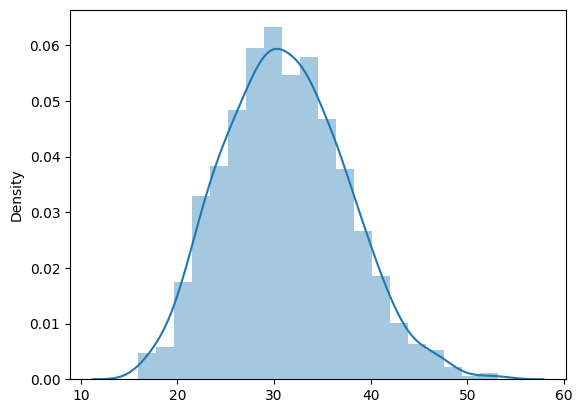

In [88]:
sns.distplot(x=DF['bmi'], bins=20, kde=True)

<Axes: xlabel='bmi'>

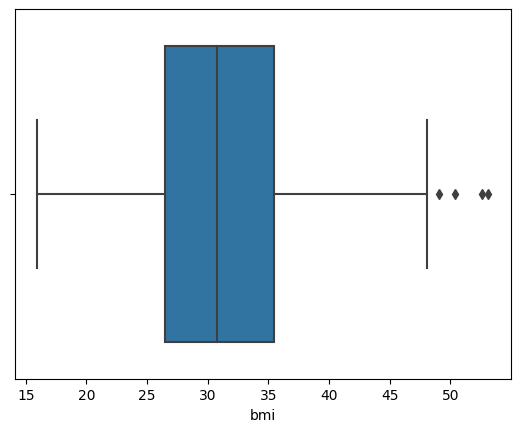

In [89]:
sns.boxplot(x='bmi',data=DF)

<Axes: xlabel='children'>

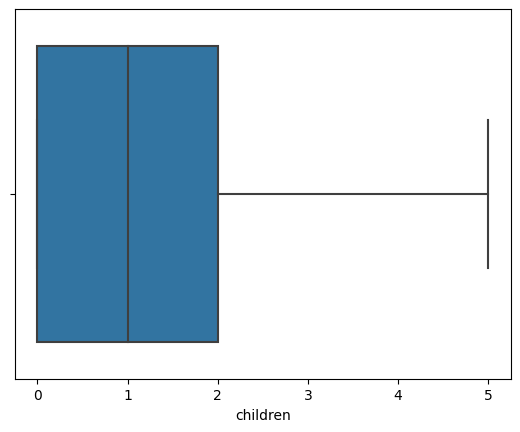

In [90]:
sns.boxplot(x='children', data=DF)

<Axes: ylabel='Frequency'>

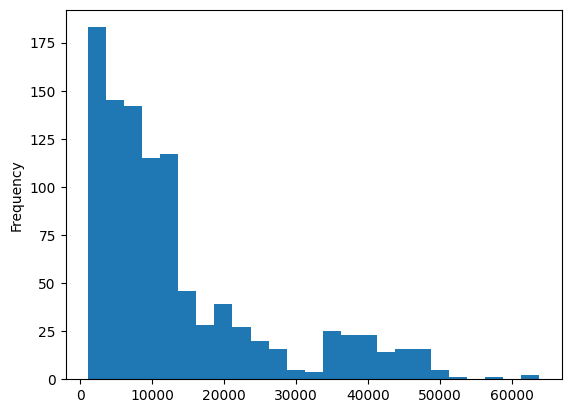

In [91]:
DF['charges'].plot(kind='hist', bins=25)

<Axes: xlabel='bmi', ylabel='charges'>

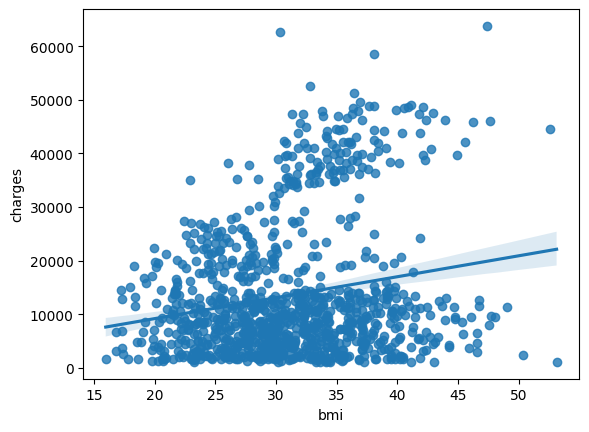

In [92]:
sns.regplot(x='bmi', y='charges', data=DF)

<Axes: xlabel='region'>

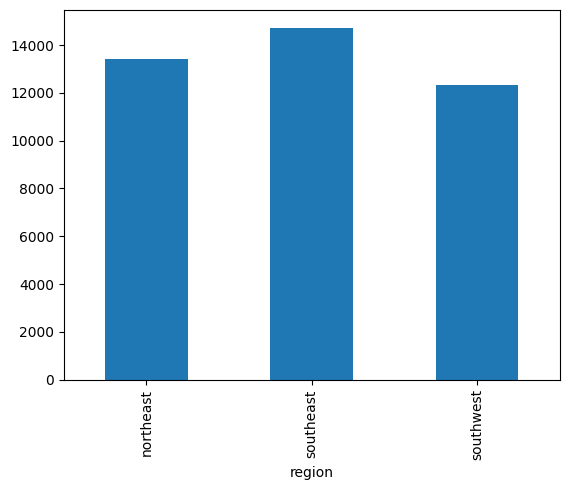

In [93]:
plt.figure()
DF.groupby('region')['charges'].mean().plot(kind='bar')

In [94]:
new_data = spark.createDataFrame(DF.rename_axis('name').reset_index() )
#spark.createDataFrame(data_clean.rename_axis('name').reset_index())

In [95]:
new_data.show()

+----+------+------+--------+------+---------+-----------+---+
|name|   sex|   bmi|children|smoker|   region|    charges|yes|
+----+------+------+--------+------+---------+-----------+---+
|2023|female|  27.9|       0|   yes|southwest|  16884.924|NaN|
|2023|  male| 33.77|       1|    no|southeast|  1725.5523|NaN|
|2023|  male|  33.0|       3|    no|southeast|   4449.462|NaN|
|2023|female| 25.74|       0|    no|southeast|  3756.6216|NaN|
|2023|female| 33.44|       1|    no|southeast|  8240.5896|NaN|
|2023|  male| 29.83|       2|    no|northeast|  6406.4107|NaN|
|2023|  male| 26.22|       0|    no|northeast|  2721.3208|NaN|
|2023|female| 26.29|       0|   yes|southeast| 27808.7251|NaN|
|2023|  male|  34.4|       0|    no|southwest|   1826.843|NaN|
|2023|female| 39.82|       0|    no|southeast| 11090.7178|NaN|
|2023|  male| 42.13|       0|   yes|southeast| 39611.7577|NaN|
|2023|  male|  24.6|       1|    no|southwest|   1837.237|NaN|
|2023|female| 30.78|       1|    no|northeast| 10797.33

In [96]:
new_data.select('region').distinct().rdd.map(lambda r: r[0]).collect()

['southeast', 'northeast', 'southwest']

##Checking For Correlation

In [97]:
from pyspark.sql.functions import corr

In [98]:
new_data.corr('bmi','charges')

0.19823924077259203

In [99]:
new_data.corr('children','charges')

0.043990584516558774

In [100]:
type(new_data)


pyspark.sql.dataframe.DataFrame

In [101]:
new_data.show(5)

+----+------+-----+--------+------+---------+---------+---+
|name|   sex|  bmi|children|smoker|   region|  charges|yes|
+----+------+-----+--------+------+---------+---------+---+
|2023|female| 27.9|       0|   yes|southwest|16884.924|NaN|
|2023|  male|33.77|       1|    no|southeast|1725.5523|NaN|
|2023|  male| 33.0|       3|    no|southeast| 4449.462|NaN|
|2023|female|25.74|       0|    no|southeast|3756.6216|NaN|
|2023|female|33.44|       1|    no|southeast|8240.5896|NaN|
+----+------+-----+--------+------+---------+---------+---+
only showing top 5 rows



#Data Preparation using One-Hot Encoder and Vector Assembler

In [102]:
from pyspark.ml.feature import StringIndexer

In [103]:
from pyspark.ml.feature import OneHotEncoder

In [104]:
from pyspark.ml.feature import VectorAssembler

In [105]:
type_indexer = StringIndexer(inputCol="region", outputCol="region_indexer").fit(new_data)
new_data = type_indexer.transform(new_data)

In [106]:
type_encoder = OneHotEncoder(inputCol="region_indexer", outputCol="region_Vector").fit(new_data)
new_data = type_encoder.transform(new_data)

In [107]:
type_indexer = StringIndexer(inputCol="sex", outputCol="sex_indexer").fit(new_data)
new_data = type_indexer.transform(new_data)

In [108]:
type_encoder = OneHotEncoder(inputCol="sex_indexer", outputCol="sex_vector").fit(new_data)
new_data = type_encoder.transform(new_data)

In [109]:
type_indexer = StringIndexer(inputCol="smoker", outputCol="smoker_indexer").fit(new_data)
new_data = type_indexer.transform(new_data)

In [110]:
type_encoder = OneHotEncoder(inputCol="smoker_indexer", outputCol="smoker_vector").fit(new_data)
new_data = type_encoder.transform(new_data)

In [111]:
new_data.show(3)

+----+------+-----+--------+------+---------+---------+---+--------------+-------------+-----------+-------------+--------------+-------------+
|name|   sex|  bmi|children|smoker|   region|  charges|yes|region_indexer|region_Vector|sex_indexer|   sex_vector|smoker_indexer|smoker_vector|
+----+------+-----+--------+------+---------+---------+---+--------------+-------------+-----------+-------------+--------------+-------------+
|2023|female| 27.9|       0|   yes|southwest|16884.924|NaN|           1.0|(2,[1],[1.0])|        1.0|    (1,[],[])|           1.0|    (1,[],[])|
|2023|  male|33.77|       1|    no|southeast|1725.5523|NaN|           0.0|(2,[0],[1.0])|        0.0|(1,[0],[1.0])|           0.0|(1,[0],[1.0])|
|2023|  male| 33.0|       3|    no|southeast| 4449.462|NaN|           0.0|(2,[0],[1.0])|        0.0|(1,[0],[1.0])|           0.0|(1,[0],[1.0])|
+----+------+-----+--------+------+---------+---------+---+--------------+-------------+-----------+-------------+--------------+-------

In [112]:
new_data1 = new_data.drop("smoker","region","sex",'yes')

In [113]:
new_data1.show(5)

+----+-----+--------+---------+--------------+-------------+-----------+-------------+--------------+-------------+
|name|  bmi|children|  charges|region_indexer|region_Vector|sex_indexer|   sex_vector|smoker_indexer|smoker_vector|
+----+-----+--------+---------+--------------+-------------+-----------+-------------+--------------+-------------+
|2023| 27.9|       0|16884.924|           1.0|(2,[1],[1.0])|        1.0|    (1,[],[])|           1.0|    (1,[],[])|
|2023|33.77|       1|1725.5523|           0.0|(2,[0],[1.0])|        0.0|(1,[0],[1.0])|           0.0|(1,[0],[1.0])|
|2023| 33.0|       3| 4449.462|           0.0|(2,[0],[1.0])|        0.0|(1,[0],[1.0])|           0.0|(1,[0],[1.0])|
|2023|25.74|       0|3756.6216|           0.0|(2,[0],[1.0])|        1.0|    (1,[],[])|           0.0|(1,[0],[1.0])|
|2023|33.44|       1|8240.5896|           0.0|(2,[0],[1.0])|        1.0|    (1,[],[])|           0.0|(1,[0],[1.0])|
+----+-----+--------+---------+--------------+-------------+-----------+

In [114]:
from pyspark.ml.linalg import DenseVector

In [115]:
from pyspark.ml.feature import StandardScaler

In [116]:
input_data = new_data.rdd.map(lambda x: (x[0], DenseVector(x[1:])))

In [117]:
df_assembler = VectorAssembler(inputCols=['region_Vector','sex_vector','smoker_vector'], outputCol="features")
#df = df_assembler.transform(df)

In [118]:
df = df_assembler.transform(new_data1)

In [119]:
df.show(5)

+----+-----+--------+---------+--------------+-------------+-----------+-------------+--------------+-------------+-----------------+
|name|  bmi|children|  charges|region_indexer|region_Vector|sex_indexer|   sex_vector|smoker_indexer|smoker_vector|         features|
+----+-----+--------+---------+--------------+-------------+-----------+-------------+--------------+-------------+-----------------+
|2023| 27.9|       0|16884.924|           1.0|(2,[1],[1.0])|        1.0|    (1,[],[])|           1.0|    (1,[],[])|    (4,[1],[1.0])|
|2023|33.77|       1|1725.5523|           0.0|(2,[0],[1.0])|        0.0|(1,[0],[1.0])|           0.0|(1,[0],[1.0])|[1.0,0.0,1.0,1.0]|
|2023| 33.0|       3| 4449.462|           0.0|(2,[0],[1.0])|        0.0|(1,[0],[1.0])|           0.0|(1,[0],[1.0])|[1.0,0.0,1.0,1.0]|
|2023|25.74|       0|3756.6216|           0.0|(2,[0],[1.0])|        1.0|    (1,[],[])|           0.0|(1,[0],[1.0])|[1.0,0.0,0.0,1.0]|
|2023|33.44|       1|8240.5896|           0.0|(2,[0],[1.0])|  

In [120]:
df.select(['features','charges']).show(5)

+-----------------+---------+
|         features|  charges|
+-----------------+---------+
|    (4,[1],[1.0])|16884.924|
|[1.0,0.0,1.0,1.0]|1725.5523|
|[1.0,0.0,1.0,1.0]| 4449.462|
|[1.0,0.0,0.0,1.0]|3756.6216|
|[1.0,0.0,0.0,1.0]|8240.5896|
+-----------------+---------+
only showing top 5 rows



#Building and Comparing ML Models

##Creation and application of 2 Transformers / Estimators in a pipeline

In [121]:
pipeline_stages=Pipeline()\
                .setStages([type_indexer,type_encoder])
pipeline_model=pipeline_stages.fit(new_data)

In [122]:
from pyspark.ml.feature import StandardScaler

In [123]:
# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

In [124]:
# Fit the DataFrame to the scaler
scaler = standardScaler.fit(df)

In [125]:
# Transform the data in `df` with the scaler
scaled_df = scaler.transform(df)

In [126]:
scaled_df.take(2)

[Row(name=2023, bmi=27.9, children=0, charges=16884.924, region_indexer=1.0, region_Vector=SparseVector(2, {1: 1.0}), sex_indexer=1.0, sex_vector=SparseVector(1, {}), smoker_indexer=1.0, smoker_vector=SparseVector(1, {}), features=SparseVector(4, {1: 1.0}), features_scaled=SparseVector(4, {1: 2.1412})),
 Row(name=2023, bmi=33.77, children=1, charges=1725.5523, region_indexer=0.0, region_Vector=SparseVector(2, {0: 1.0}), sex_indexer=0.0, sex_vector=SparseVector(1, {0: 1.0}), smoker_indexer=0.0, smoker_vector=SparseVector(1, {0: 1.0}), features=DenseVector([1.0, 0.0, 1.0, 1.0]), features_scaled=DenseVector([2.0832, 0.0, 1.9993, 2.4403]))]

Train-Test Split

In [127]:
# Split the data into train and test sets
train_data, test_data = scaled_df.randomSplit([.7,.3],seed=1234)
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 716
Test Dataset Count: 297


In [128]:
train_data.show()

+----+------+--------+-----------+--------------+-------------+-----------+-------------+--------------+-------------+-----------------+--------------------+
|name|   bmi|children|    charges|region_indexer|region_Vector|sex_indexer|   sex_vector|smoker_indexer|smoker_vector|         features|     features_scaled|
+----+------+--------+-----------+--------------+-------------+-----------+-------------+--------------+-------------+-----------------+--------------------+
|2023|17.195|       2|14455.64405|           2.0|    (2,[],[])|        1.0|    (1,[],[])|           1.0|    (1,[],[])|        (4,[],[])|           (4,[],[])|
|2023| 17.29|       2| 12829.4551|           2.0|    (2,[],[])|        0.0|(1,[0],[1.0])|           1.0|    (1,[],[])|    (4,[2],[1.0])|(4,[2],[1.9992941...|
|2023|17.955|       2|15006.57945|           2.0|    (2,[],[])|        1.0|    (1,[],[])|           1.0|    (1,[],[])|        (4,[],[])|           (4,[],[])|
|2023|18.905|       3| 4827.90495|           2.0|   

#Training the Model

In [129]:
# Import `LinearRegression`
from pyspark.ml.regression import LinearRegression

In [130]:
# Initialize `lr`
lr = LinearRegression(labelCol="charges", maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [131]:
# Fit the data to the model
linearModel = lr.fit(train_data)

In [132]:
# Generate predictions
predicted = linearModel.transform(test_data)
predicted.show()

+----+------+--------+-----------+--------------+-------------+-----------+-------------+--------------+-------------+-----------------+--------------------+------------------+
|name|   bmi|children|    charges|region_indexer|region_Vector|sex_indexer|   sex_vector|smoker_indexer|smoker_vector|         features|     features_scaled|        prediction|
+----+------+--------+-----------+--------------+-------------+-----------+-------------+--------------+-------------+-----------------+--------------------+------------------+
|2023| 15.96|       0|  1694.7964|           2.0|    (2,[],[])|        0.0|(1,[0],[1.0])|           0.0|(1,[0],[1.0])|[0.0,0.0,1.0,1.0]|[0.0,0.0,1.999294...| 8014.409530129033|
|2023|16.815|       1| 3167.45585|           2.0|    (2,[],[])|        1.0|    (1,[],[])|           0.0|(1,[0],[1.0])|    (4,[3],[1.0])|(4,[3],[2.4402759...| 8579.915128380137|
|2023|  17.8|       0|   1727.785|           1.0|(2,[1],[1.0])|        1.0|    (1,[],[])|           0.0|(1,[0],[1.0

#Getting the outcome

In [133]:
# Coefficients for the model
linearModel.coefficients

DenseVector([312.796, -339.964, -565.5056, -24577.0558])

In [134]:
# Intercept for the model
linearModel.intercept

33156.97091093541

In [135]:
# Get the RMSE
linearModel.summary.rootMeanSquaredError

7352.8981065771095

In [136]:
# Get the R2
linearModel.summary.r2

0.639148893019452